In [19]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub")
print(os.getcwd())
plt.rcParams['font.family'] = 'AppleGothic'

/Users/yj.noh/Documents/GitHub


In [20]:
rr = pd.read_csv("CRM-effect-analyst-/app_push_filtered.csv", encoding = "utf-8")
data = pd.read_csv("/Users/yj.noh/Desktop/lms_data.csv", encoding = "utf-8")

print(rr.head(2))
print(data.head(2))

   Unnamed: 0                                             mem_no crm_group  \
0           1  4B81D6AC389F3B3EC2C4F9B7C8F6777345DEBFF9FA5BE5...   control   
1           2  5478B68F16B59793F918F286F5C622A556E0FDF342FE16...   control   

         time          first_logon          first_dlvry  ord_cnt    cluster  \
0  2023-11-24                  NaN                  NaN        0   part_all   
1  2023-11-24  2023-11-24 19:55:00  2023-11-24 20:05:00        2  part_peak   

  is_churn  risk_ratio  is_logon  is_dlvry  
0       NO    4.238532         0         0  
1       NO    2.270270         1         1  
                                              mem_no crm_group  cnt_1  cnt_2  \
0  F4225CD4017747A82EE2458096F4BBA3F30B92E5E43A33...   control      0      0   
1  8908BD8638B837D2D4D766E80AA85E17E37E07C9AE45C8...   control      0      0   

   cnt_3  cnt_day  
0      0        0  
1      0        0  


In [21]:
# join
data = pd.merge(data, rr[["mem_no", "cluster", "is_churn", "risk_ratio", "is_logon", "is_dlvry"]], left_on = "mem_no", right_on = "mem_no", how = "left")
print(data.head())

                                              mem_no crm_group  cnt_1  cnt_2  \
0  F4225CD4017747A82EE2458096F4BBA3F30B92E5E43A33...   control      0      0   
1  8908BD8638B837D2D4D766E80AA85E17E37E07C9AE45C8...   control      0      0   
2  DB2E1B5F3611524B6EEE4548C4B2D6FFDEC98ED1077237...   control      0      0   
3  DBE894811F0257E6548A2225AF739051A3039E1E7BBE8F...   control      0      0   
4  769CEC9E0118C17F1B41689C7B0B6EA8F8285BF012CDF7...   control      0      0   

   cnt_3  cnt_day    cluster is_churn  risk_ratio  is_logon  is_dlvry  
0      0        0   part_all      YES   46.773585         0         0  
1      0        0   part_all      YES   33.000000         0         0  
2      0        0  part_peak       NO   16.500000         0         0  
3      0        0  part_peak       NO    1.534884         0         0  
4      0        0  part_peak       NO    4.771084         0         0  


In [22]:
data['lms_group'] = data.apply(
    lambda row: 'control' if (row['crm_group'] == 'control' and row['is_logon'] == 1 and row['is_dlvry'] == 0) 
    else ('test' if row['crm_group'] == 'test' else 'no'), axis=1)

df = data[data['lms_group'].isin(['control', 'test'])]
print(df.shape)


(1529, 12)


In [23]:
df['is_ok'] = (df['cnt_day'] >= 15).astype(int)
print(df['is_ok'].value_counts())

is_ok
0    1197
1     332
Name: count, dtype: int64


In [24]:
def plot_numeric (data, numeric_vars, outcome):
    
    palette = 'coolwarm'
    
    for num_var in numeric_vars:
        fig, axs = plt.subplots(1,3, figsize=(12,4))
        fig.suptitle(f'{num_var}', fontsize = 12)
    
        # Boxplot
        sns.boxplot(ax=axs[0], x= outcome, y=num_var, data= data, palette = palette)
        axs[0].set_title('Boxplot')
    
        # Violinplot
        sns.violinplot(ax=axs[1], x = outcome, y = num_var, data = data, palette = palette)
        axs[1].set_title('Violinplot')
        
        # KDE plot
        sns.kdeplot(ax=axs[2], data = data, x = num_var, hue = outcome, fill = True, common_norm = False, palette = palette, alpha=.5, linewidth=0)
        axs[2].set_title('Density plot')
        
        plt.tight_layout()
        fig.subplots_adjust(top=0.8) # title 공간 확보
        
        plt.show()
        plt.close(fig)

In [25]:
def plot_category(data, category_vars, outcome) : 

    palette = 'coolwarm'
        
    for cat_var in category_vars : 
        plt.figure(figsize = (12,4))
        ax = sns.countplot(x=cat_var, hue=outcome, data=data, palette=palette)
        plt.title(f'{cat_var}')
        plt.ylabel('개수')
        plt.legend(title=outcome, loc='upper right')
        plt.xticks(fontsize=8)  # x축 글씨 조정
        
        # 각 막대에 데이터 레이블 추가
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',  # 높이 값(즉, 개수)을 얻어 텍스트로 설정
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # 텍스트 위치 설정
                        ha='center',  # 가로 정렬(center)
                        va='center',  # 세로 정렬(center)
                        xytext=(0, 10),  # 텍스트 오프셋(위쪽으로 약간 이동)
                        textcoords='offset points',  # 어떤 종류의 오프셋을 사용할지 정의
                        fontsize=10)  # 글꼴 크기
        
        
        plt.tight_layout()
        plt.show()

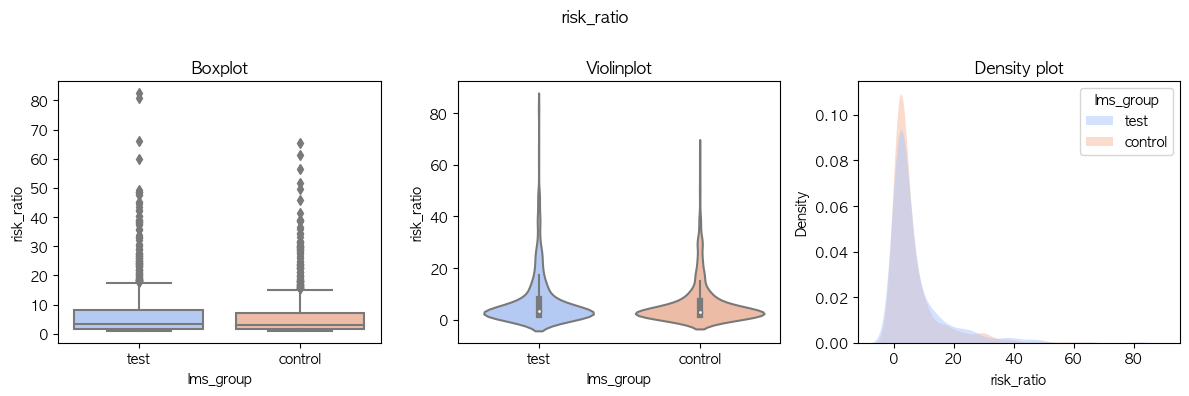

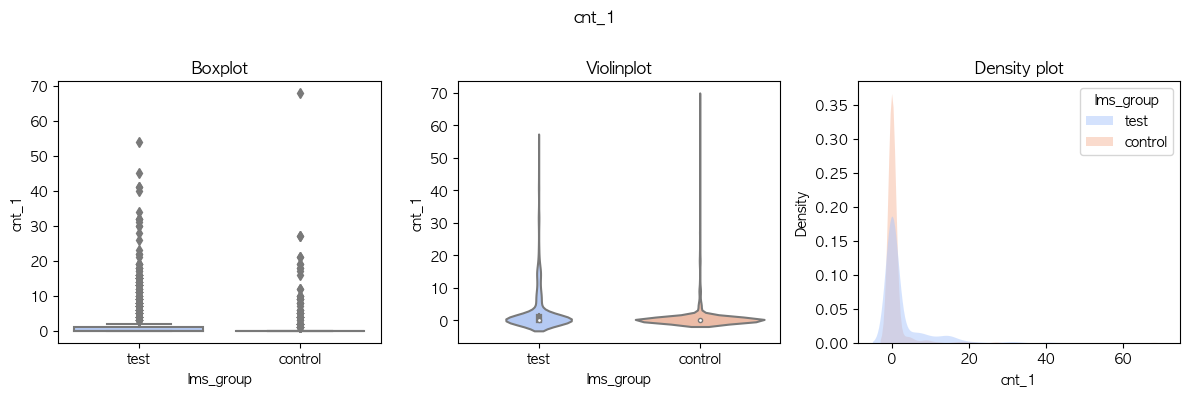

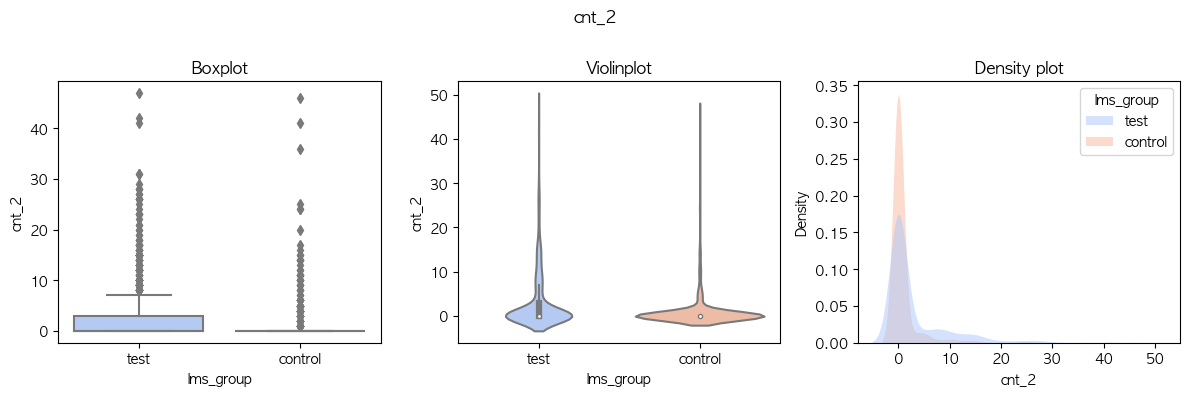

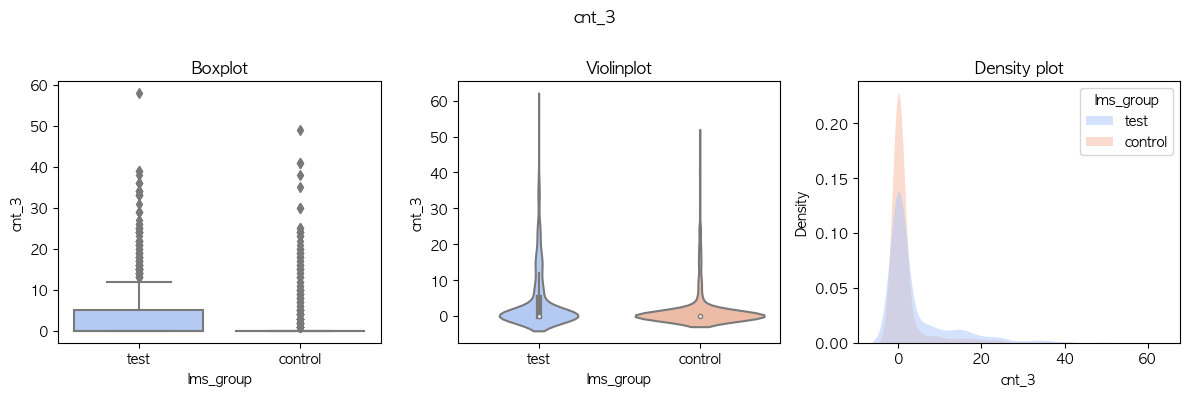

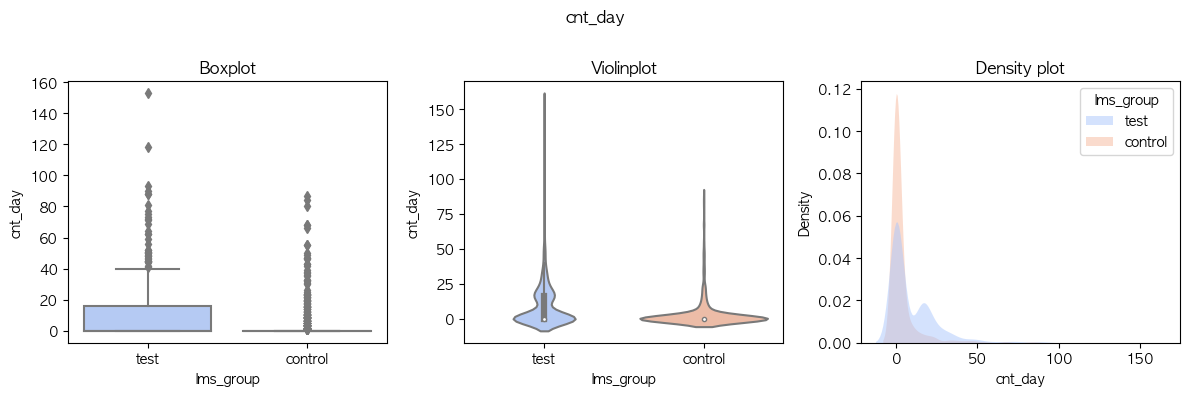

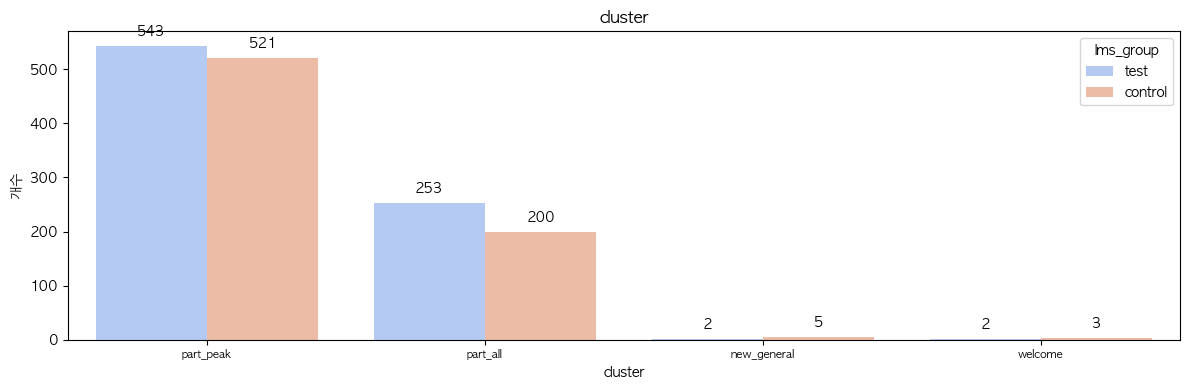

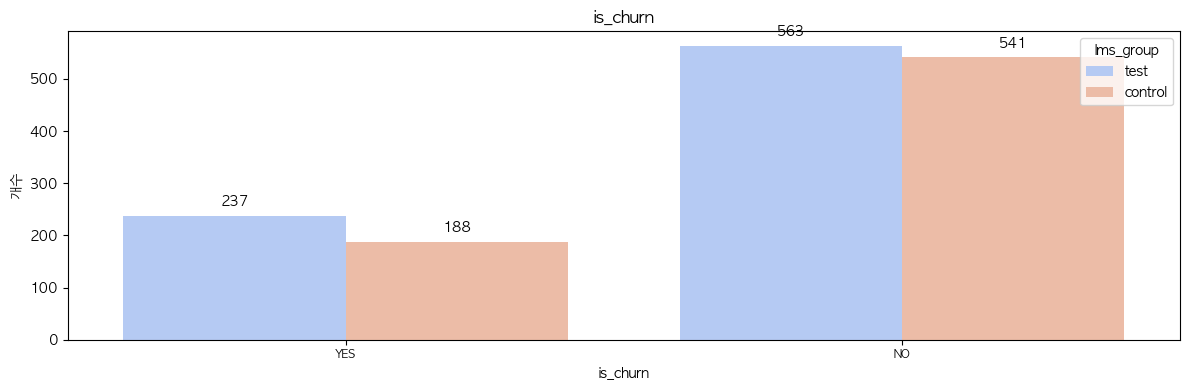

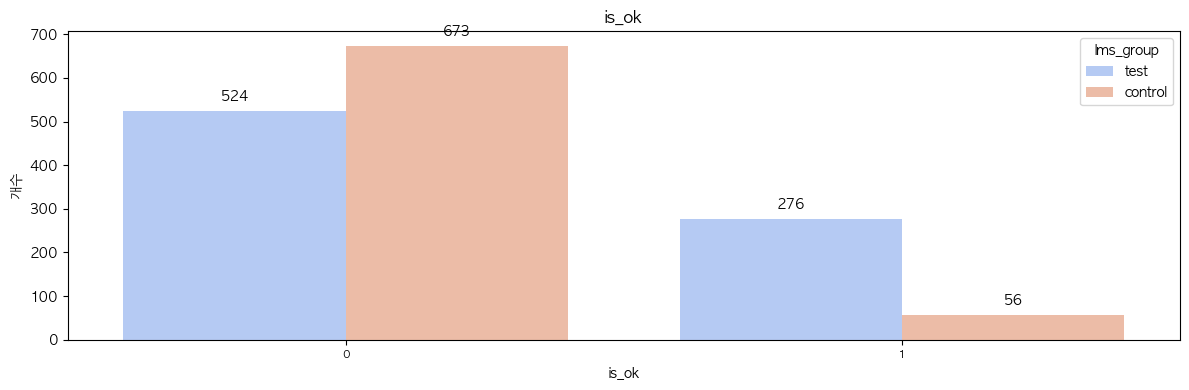

In [26]:
num_vars = ['risk_ratio', 'cnt_1', 'cnt_2', 'cnt_3', 'cnt_day']
category_vars = ['cluster', 'is_churn', 'is_ok']

plot_numeric(df, num_vars, 'lms_group')
plot_category(df, category_vars, 'lms_group')